In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('D:\work\email_anay\data\服务单统计报告1_2025-01-01 00_00_00_2025-02-01 00_46_18.csv', encoding='ansi')

C:\Users\baycheer\AppData\Local\Temp\ipykernel_21384\157597282.py:1: DtypeWarning: Columns (99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\work\email_anay\data\服务单统计报告1_2025-01-01 00_00_00_2025-02-01 00_46_18.csv', encoding='ansi')


In [19]:
print(len(data))
data.head(3)

40115


,服务单ID,服务单标题,日期,用户地址,用户邮件数,客服邮件数,客服人员数,最早未回复时间,未回复邮件数,平均回复时效(分钟),...,回复客服人员.38,回复时间.38,回复客服人员.39,回复时间.39,回复客服人员.40,回复时间.40,回复客服人员.41,回复时间.41,回复客服人员.42,回复时间.42
0,360457518,\t241125054214246,2025-01-01 00:01:42,charlotterosedouglas@hotmail.com,1,1,1,NaN,0,811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,360457519,\t241116114602474,2025-01-01 00:01:50,glenkaczer18@gmail.com,1,1,1,NaN,0,811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,360457520,\t241021224402704,2025-01-01 00:02:12,diandsmt@live.fr,2,3,1,NaN,0,1847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
service_id_list = data['服务单ID'].to_list()
with open("D:\work\email_anay\data\January_services_id.txt", "w") as f:
    for service_id in service_id_list:
        service_id = str(service_id)
        f.write(service_id + "\n")

In [28]:
from tqdm import tqdm
from typing import List
import requests

def get_single_email_service_data(service_id: str):
    """通过服务单号从api获取服务单数据"""
    url = "https://api.baycheer.com/Email/getEmailServiceDetail"
    param = {
        "app_id": "392020",
        "app_token": "BT095WCP2ZE5KF1WDGV8YD420U6VVMIY",
        "email_service_id": service_id
    }
    response = requests.post(url, data=param)
    if response.status_code == 200:
        # 提取返回内容
        data = response.json().get("data")
        return data[0]
    else:
        raise Exception(f"请求邮件服务失败，状态码：{response.status_code}")


def get_email_service_data(service_id:List[str]):
    """
    通过服务单号从api获取服务单数据
    """
    if isinstance(service_id, str):
        return get_single_email_service_data(service_id)
    
    if len(service_id) >= 1000:
        result = []
        for i in tqdm(range(0, len(service_id), 1000), desc="正在获取服务单数据"):
            chunk = service_id[i:i+1000]
            chunk_ids = ",".join(chunk)
            url = "https://api.baycheer.com/Email/getEmailServiceDetail"
            param = {
                "app_id": "392020",
                "app_token": "BT095WCP2ZE5KF1WDGV8YD420U6VVMIY",
                "email_service_id": chunk_ids
            }
            response = requests.post(url, data=param)
            if response.status_code == 200:
                chunk_data = response.json().get("data")
                result.extend(chunk_data if chunk_data else [])
        return result

    else:
        service_id = ",".join(service_id)
        url = "https://api.baycheer.com/Email/getEmailServiceDetail"
        param = {
            "app_id": "392020",
            "app_token": "BT095WCP2ZE5KF1WDGV8YD420U6VVMIY",
            "email_service_id": service_id
        }
        response = requests.post(url, data=param)
        if response.status_code == 200:
            # 提取返回内容
            data = response.json().get("data")
            return data
        else:
            raise Exception(f"请求邮件服务失败，状态码：{response.status_code}")


services = {}

service_id_list = [service_id.strip() for service_id in open("D:\work\email_anay\data\January_services_id.txt", "r").readlines()]
services_data = get_email_service_data(service_id_list)


正在获取服务单数据: 100%|██████████| 41/41 [00:12<00:00,  3.27it/s]


In [29]:
services_data[0]

{'email_service_id': '360458517',
 'customer_address': 'cherylharlan1@gmail.com',
 'email_account_id': '36311',
 'title': '服务单：360458517',
 'status': '4',
 'add_time': '2025-01-02 02:45:16',
 'type': '10',
 'email_list': [{'email_id': '307890795', 'email_type': '1'},
  {'email_id': '307890833', 'email_type': '2'}]}

In [31]:
for service in services_data:
    services[service["email_service_id"]] = service['email_list']

services


{'360458517': [{'email_id': '307890795', 'email_type': '1'},
  {'email_id': '307890833', 'email_type': '2'}],
 '360458516': [{'email_id': '307890793', 'email_type': '1'},
  {'email_id': '307896561', 'email_type': '2'},
  {'email_id': '307924867', 'email_type': '1'},
  {'email_id': '307926322', 'email_type': '2'},
  {'email_id': '307926470', 'email_type': '1'},
  {'email_id': '307927989', 'email_type': '2'},
  {'email_id': '307932734', 'email_type': '1'},
  {'email_id': '307935447', 'email_type': '2'},
  {'email_id': '307935535', 'email_type': '1'},
  {'email_id': '307941299', 'email_type': '2'},
  {'email_id': '307943243', 'email_type': '1'},
  {'email_id': '307950515', 'email_type': '2'},
  {'email_id': '307952819', 'email_type': '1'},
  {'email_id': '307962721', 'email_type': '2'},
  {'email_id': '307963482', 'email_type': '1'},
  {'email_id': '307964606', 'email_type': '2'},
  {'email_id': '308081162', 'email_type': '2'}],
 '360458515': [{'email_id': '307890787', 'email_type': '1'},

In [46]:
def count_conversation_rounds(email_list):
    """类型改变时记为一轮对话"""
    if not email_list:
        return 0
    
    rounds = 1

    sorted_emails = sorted(email_list, key=lambda x: x['email_id'])
    # 计算类型变化的次数（顾客->客服 或 客服->顾客）
    changes = 0
    prev_type = sorted_emails[0]['email_type']
    for email in sorted_emails[1:]:
        current_type = email['email_type']
        if current_type != prev_type:
            changes += 1
            prev_type = current_type

    # 每两次类型变化构成一轮完整对话，向上取整
    # 如果从顾客开始，奇数次变化意味着最后一轮未完成
    # 如果从客服开始，偶数次变化意味着最后一轮未完成
    return (changes + 1) // 2

service_rounds = {}
for service_id, email_list in services.items():
    service_rounds[service_id] = count_conversation_rounds(email_list)


service_rounds

{'360458517': 1,
 '360458516': 8,
 '360458515': 1,
 '360458514': 1,
 '360458513': 1,
 '360458512': 4,
 '360458511': 1,
 '360458510': 5,
 '360458509': 1,
 '360458508': 1,
 '360458507': 1,
 '360458506': 1,
 '360458505': 1,
 '360458504': 1,
 '360458503': 1,
 '360458502': 1,
 '360458501': 1,
 '360458500': 1,
 '360458499': 5,
 '360458498': 1,
 '360458497': 1,
 '360458496': 1,
 '360458495': 1,
 '360458494': 1,
 '360458493': 13,
 '360458492': 1,
 '360458491': 1,
 '360458490': 3,
 '360458489': 1,
 '360458488': 1,
 '360458487': 0,
 '360458486': 1,
 '360458485': 0,
 '360458484': 1,
 '360458483': 1,
 '360458482': 1,
 '360458481': 1,
 '360458480': 4,
 '360458479': 1,
 '360458478': 1,
 '360458477': 8,
 '360458476': 11,
 '360458475': 1,
 '360458474': 4,
 '360458473': 1,
 '360458472': 1,
 '360458471': 1,
 '360458470': 5,
 '360458469': 3,
 '360458468': 2,
 '360458467': 1,
 '360458466': 1,
 '360458465': 1,
 '360458464': 1,
 '360458463': 1,
 '360458462': 1,
 '360458461': 0,
 '360458460': 1,
 '360458459'

In [61]:
result = pd.DataFrame(columns=["服务单ID", "服务单类型", "对话轮数","服务单状态", "服务单耗时"])
result_data = {
    "服务单ID": [],
    "服务单类型": [],
    "对话轮数": [],
    "服务单状态": [],
    "服务单耗时": []
}

for _, row in data.iterrows():
    service_id = row['服务单ID']
    
    result_data["服务单ID"].append(service_id)
    result_data["服务单类型"].append(row['服务单类型.1'])
    result_data["对话轮数"].append(service_rounds.get(str(service_id), 0))
    result_data["服务单状态"].append(row['服务单状态'])
    result_data["服务单耗时"].append(row['持续时间(分钟)'])

result = pd.DataFrame(result_data)



In [62]:
result.to_csv("D:\work\email_anay\data\January_service_rounds.csv", index=False, encoding='utf-8')

In [63]:
result_without_0 = result[result['对话轮数'] != 0]
result_without_0.to_csv("D:\work\email_anay\data\January_service_rounds_without_0.csv", index=False, encoding='utf-8')

In [64]:
all_result = result
result = result_without_0

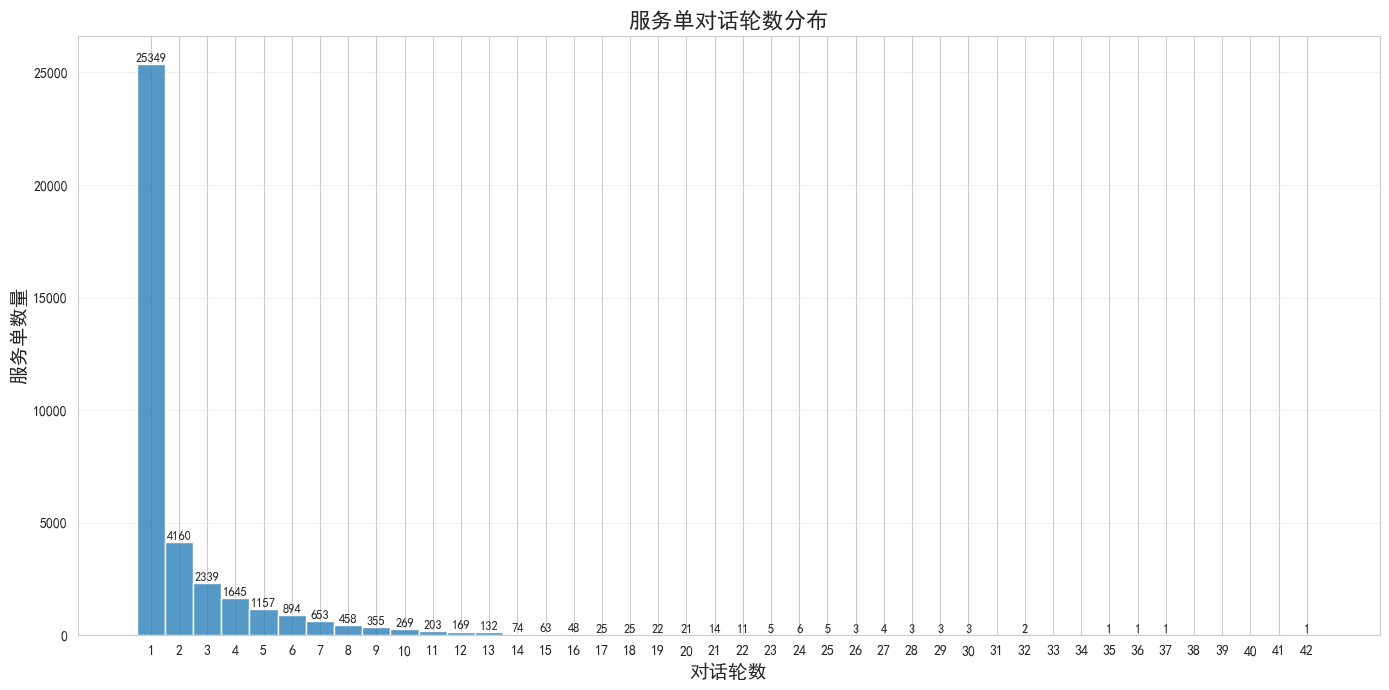

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

plt.figure(figsize=(14, 7))

# 获取对话轮数的范围
x_min = int(result['对话轮数'].min())
x_max = int(result['对话轮数'].max())

# 设置柱的位置为每个整数值
bins = np.arange(x_min, x_max + 2) - 0.5  # +2是为了包含最大值并确保右边界，-0.5使整数值在柱的中间

# 绘制优化的柱状图
sns.histplot(data=result, x="对话轮数", bins=bins, kde=False, discrete=True)

# 设置X轴刻度为整数值
plt.xticks(np.arange(x_min, x_max + 1, 1))  # 每个整数值都有刻度

# 在柱顶部添加数量标签
counts, edges = np.histogram(result['对话轮数'], bins=bins)
for i in range(len(counts)):
    if counts[i] > 0:  # 只为有值的柱添加标签
        plt.text(edges[i] + 0.5, counts[i] + 5, str(counts[i]), 
                 ha='center', va='bottom', fontsize=9)

plt.title('服务单对话轮数分布', fontsize=16)
plt.xlabel('对话轮数', fontsize=14)
plt.ylabel('服务单数量', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


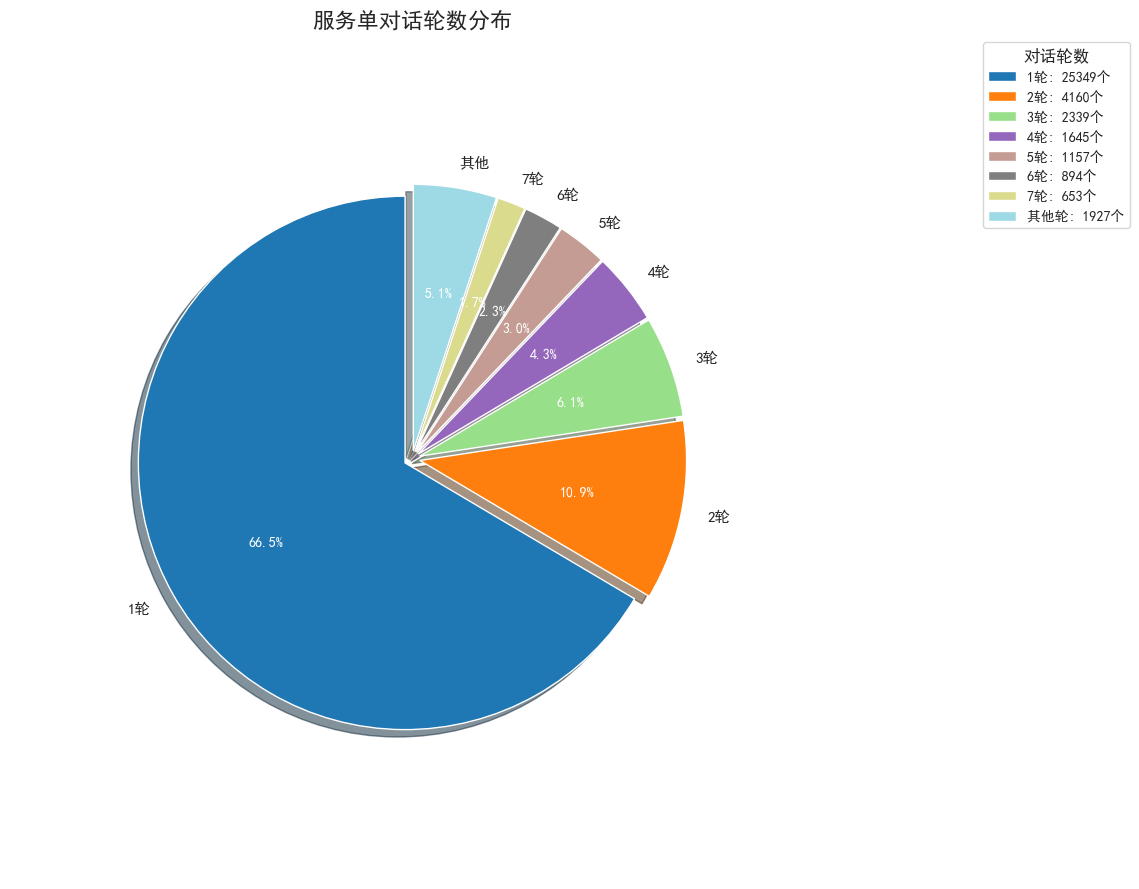

In [70]:
# 2. 对话轮数的饼状图（针对离散整数值）
plt.figure(figsize=(12, 9))

# 统计每个对话轮数的频次
round_counts = result['对话轮数'].value_counts().sort_index()

# 合并出现频次较低的轮数（可选）
# 如果对话轮数过多，可以选择只显示前N个常见值，其余归为"其他"类别
threshold = 20  # 可以调整这个阈值
if len(round_counts) > 8:  # 如果不同轮数超过8个，合并出现次数少的
    top_counts = round_counts.head(7)  # 保留前7个常见的轮数
    other_counts = pd.Series({'其他': round_counts[7:].sum()})
    round_counts = pd.concat([top_counts, other_counts])

# 设置颜色
colors = plt.cm.tab20(np.linspace(0, 1, len(round_counts)))

# 计算每组的百分比并绘制饼图
patches, texts, autotexts = plt.pie(
    round_counts, 
    labels=[f'{int(idx)}轮' if isinstance(idx, (int, float)) and idx != '其他' else idx 
            for idx in round_counts.index], 
    autopct='%1.1f%%',
    startangle=90, 
    shadow=True, 
    explode=[0.03] * len(round_counts),
    textprops={'fontsize': 11}, 
    colors=colors
)

# 调整百分比标签的颜色以提高可读性
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

# 添加图例，显示具体数量
plt.legend(title='对话轮数', loc='upper right', 
           labels=[f'{int(idx) if isinstance(idx, (int, float)) and idx != "其他" else idx}轮: {count}个' 
                   for idx, count in zip(round_counts.index, round_counts)],
           bbox_to_anchor=(1.4, 1), fontsize=10, title_fontsize=12)

plt.axis('equal')  # 保证饼图是圆形的
plt.title('服务单对话轮数分布', fontsize=16)
plt.tight_layout()
plt.show()

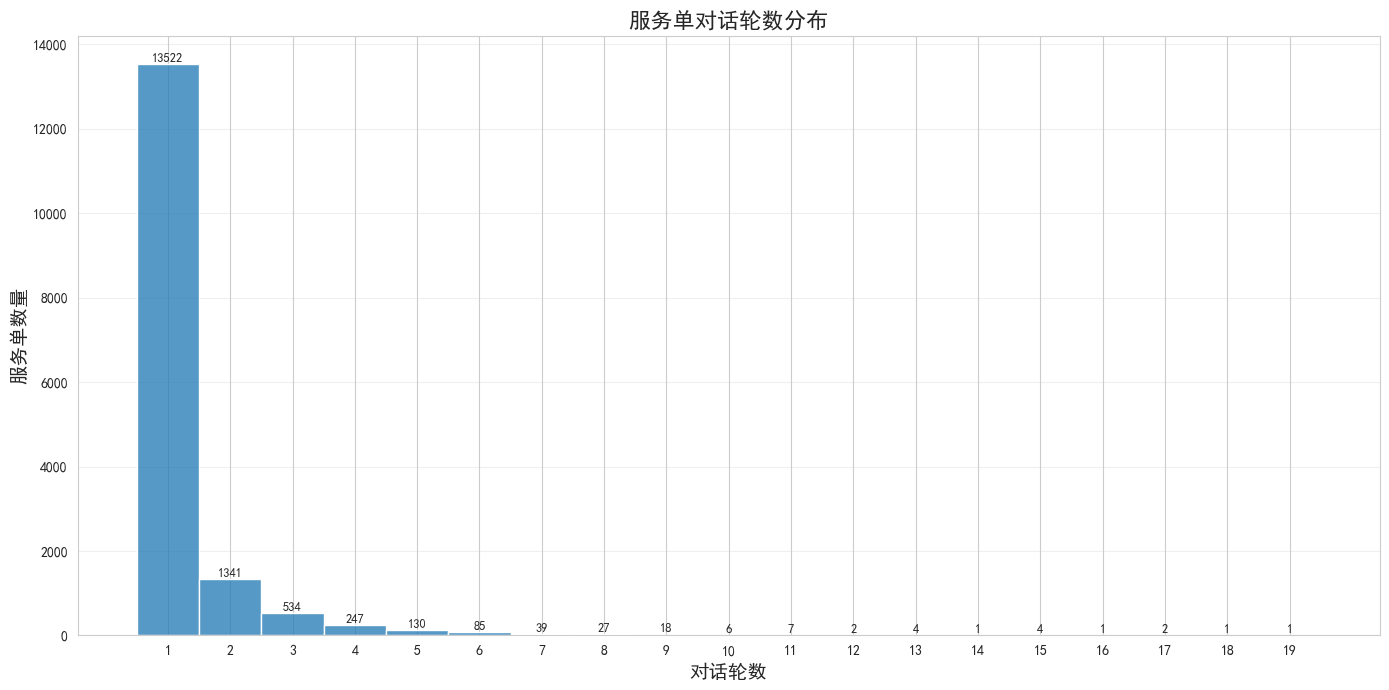

In [71]:
# 只关注服务单状态为“已审核-合格"的数据
valid_result = result[result['服务单状态'] == '已审核-合格']
result = valid_result
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

plt.figure(figsize=(14, 7))

# 获取对话轮数的范围
x_min = int(result['对话轮数'].min())
x_max = int(result['对话轮数'].max())

# 设置柱的位置为每个整数值
bins = np.arange(x_min, x_max + 2) - 0.5  # +2是为了包含最大值并确保右边界，-0.5使整数值在柱的中间

# 绘制优化的柱状图
sns.histplot(data=result, x="对话轮数", bins=bins, kde=False, discrete=True)

# 设置X轴刻度为整数值
plt.xticks(np.arange(x_min, x_max + 1, 1))  # 每个整数值都有刻度

# 在柱顶部添加数量标签
counts, edges = np.histogram(result['对话轮数'], bins=bins)
for i in range(len(counts)):
    if counts[i] > 0:  # 只为有值的柱添加标签
        plt.text(edges[i] + 0.5, counts[i] + 5, str(counts[i]), 
                 ha='center', va='bottom', fontsize=9)

plt.title('服务单对话轮数分布', fontsize=16)
plt.xlabel('对话轮数', fontsize=14)
plt.ylabel('服务单数量', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

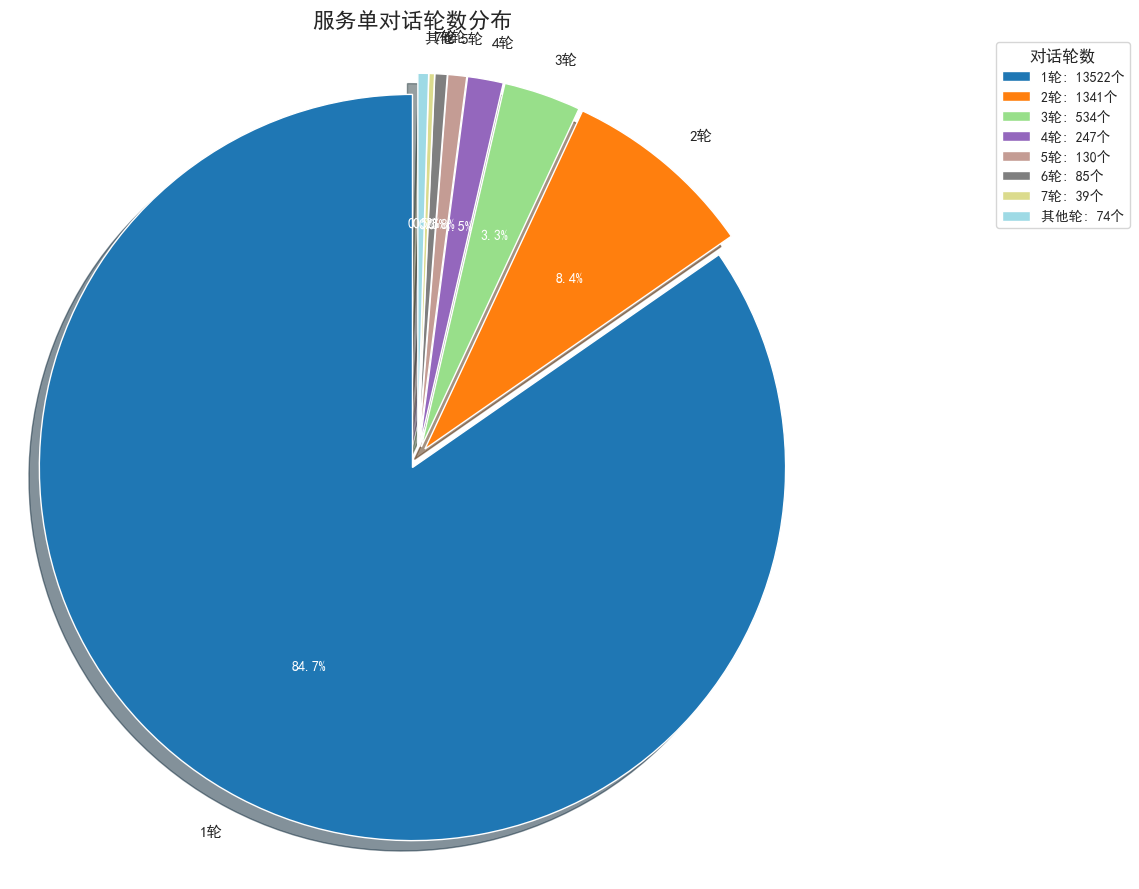

In [72]:
# 2. 对话轮数的饼状图（针对离散整数值）
plt.figure(figsize=(12, 9))

# 统计每个对话轮数的频次
round_counts = result['对话轮数'].value_counts().sort_index()

# 合并出现频次较低的轮数（可选）
# 如果对话轮数过多，可以选择只显示前N个常见值，其余归为"其他"类别
threshold = 20  # 可以调整这个阈值
if len(round_counts) > 8:  # 如果不同轮数超过8个，合并出现次数少的
    top_counts = round_counts.head(7)  # 保留前7个常见的轮数
    other_counts = pd.Series({'其他': round_counts[7:].sum()})
    round_counts = pd.concat([top_counts, other_counts])

# 设置颜色
colors = plt.cm.tab20(np.linspace(0, 1, len(round_counts)))

# 计算每组的百分比并绘制饼图
patches, texts, autotexts = plt.pie(
    round_counts, 
    labels=[f'{int(idx)}轮' if isinstance(idx, (int, float)) and idx != '其他' else idx 
            for idx in round_counts.index], 
    autopct='%1.1f%%',
    startangle=90, 
    shadow=True, 
    explode=[0.03] * len(round_counts),
    textprops={'fontsize': 11}, 
    colors=colors
)

# 调整百分比标签的颜色以提高可读性
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

# 添加图例，显示具体数量
plt.legend(title='对话轮数', loc='upper right', 
           labels=[f'{int(idx) if isinstance(idx, (int, float)) and idx != "其他" else idx}轮: {count}个' 
                   for idx, count in zip(round_counts.index, round_counts)],
           bbox_to_anchor=(1.4, 1), fontsize=10, title_fontsize=12)

plt.axis('equal')  # 保证饼图是圆形的
plt.title('服务单对话轮数分布', fontsize=16)
plt.tight_layout()
plt.show()